In [9]:
import pandas as pd
df = pd.read_csv("../Datasets/U.S._State_and_Territorial_Stay-At-Home_Orders__March_15___December_31_by_County_by_Day.csv", low_memory=False)

In [92]:
df = df.copy()
df = df[~df['State_Tribe_Territory'].isin(['DC','AS','GU','MP','PR','VI'])]
df.rename(columns={'State_Tribe_Territory':'State'},inplace=True)
len(df['State'].unique()) == 50 #True
#Remove territories and rename STT to State

True

<AxesSubplot:>

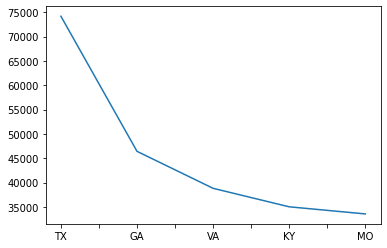

In [96]:
# Number of records by state        
df.iloc[:,0].value_counts().head().plot()

In [116]:
[("***"+col) for col in df.columns]

['***State',
 '***County_Name',
 '***FIPS_State',
 '***FIPS_County',
 '***date',
 '***Current_order_status',
 '***Order_code',
 '***Issuing_Jurisdiction',
 '***Jurisdiction_Type',
 '***Stay_at_Home_Order_Recommendation',
 '***Effective_date',
 '***Expiration_date',
 '***Effective_NA_Reason',
 '***Expiration_NA_Reason',
 '***Date_Signed',
 '***Express_Preemption',
 '***origin_dataset',
 '***Source_of_Action',
 '***URL',
 '***Citation']

In [142]:
df.groupby(["State","County_Name"]).count().iloc[1] # ~292 records per county, 292 days per county

FIPS_State                           292
FIPS_County                          292
date                                 292
Current_order_status                 292
Order_code                           292
Issuing_Jurisdiction                 279
Jurisdiction_Type                    292
Stay_at_Home_Order_Recommendation    279
Effective_date                       279
Expiration_date                       24
Effective_NA_Reason                    0
Expiration_NA_Reason                   3
Date_Signed                          279
Express_Preemption                   279
origin_dataset                       279
Source_of_Action                     279
URL                                  279
Citation                             279
Name: (AK, Aleutians West Census Area), dtype: int64

In [226]:
for county in df["County_Name"].unique():
    AC=df[df["County_Name"]==county]
    AC.plot("date", "Order_code")
    AC["Current_order_status"].unique()
    AC.groupby(["Current_order_status","Order_code"]).count()
    AC[AC["Order_code"]==1].date.to_frame().value_counts().max()

NameError: name 'unique' is not defined

AttributeError: 'Series' object has no attribute 'date'